In [9]:
#For this Final Project, you will use the Cigarette data set in the Ecdat package. 
# To do this, you first must install the Ecdat package with the command
install.packages("Ecdat")
install.packages("ggplot2")
install.packages("dplyr")


The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpbppvIc/downloaded_packages

The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpbppvIc/downloaded_packages

The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpbppvIc/downloaded_packages


In [10]:
# To make this package accessible to your R session, type the command
library(Ecdat)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:

head(Cigarette)

,state,year,cpi,pop,packpc,income,tax,avgprs,taxs
,<fct>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,AL,1985,1.076,3973000,116.4863,46014968,32.5,102.18167,33.34834
2,AR,1985,1.076,2327000,128.5346,26210736,37.0,101.47500,37.00000
3,AZ,1985,1.076,3184000,104.5226,43956936,31.0,108.57875,36.17042
4,CA,1985,1.076,26444000,100.3630,447102816,26.0,107.83734,32.10400
5,CO,1985,1.076,3209000,112.9635,49466672,31.0,94.26666,31.00000
6,CT,1985,1.076,3201000,109.2784,60063368,42.0,128.02499,51.48333


#You should now be able to see the Cigarette data frame:

# View(Cigarette) view doesn't work in Jupyter

#state year cpi pop packpc income tax avgprs taxs

#1 AL 1985 1.076 3973000 116.4863 46014968 32.5 102.18167 33.34834

#2 AR 1985 1.076 2327000 128.5346 26210736 37.0 101.47500 37.00000

#3 AZ 1985 1.076 3184000 104.5226 43956936 31.0 108.57875 36.17042

#4 CA 1985 1.076 26444000 100.3630 447102816 26.0 107.83734 32.10400

#5 CO 1985 1.076 3209000 112.9635 49466672 31.0 94.26666 31.00000

#6 CT 1985 1.076 3201000 109.2784 60063368 42.0 128.02499 51.48333

#Each row provides data about a given state in a given year. This data set has the following variables:
    
#state: the two letter abbreviation for the state.
#year: the year.
#cpi: consumer price index for the year.
#pop: state population
#packpc: average number of packs of cigarettes per capita per year
#income: total state personal income.
#tax: average state, federal, and average local excise taxes for fiscal year.
#avgprs: average price per pack during fiscal year, including sales taxes, in cents.
#taxs: average excise taxes per pack for fiscal year, including sales taxes, in cents.


In [4]:
#Complete the project by completing the following. Remember to document your process and your results in your PowerPoint presentation.

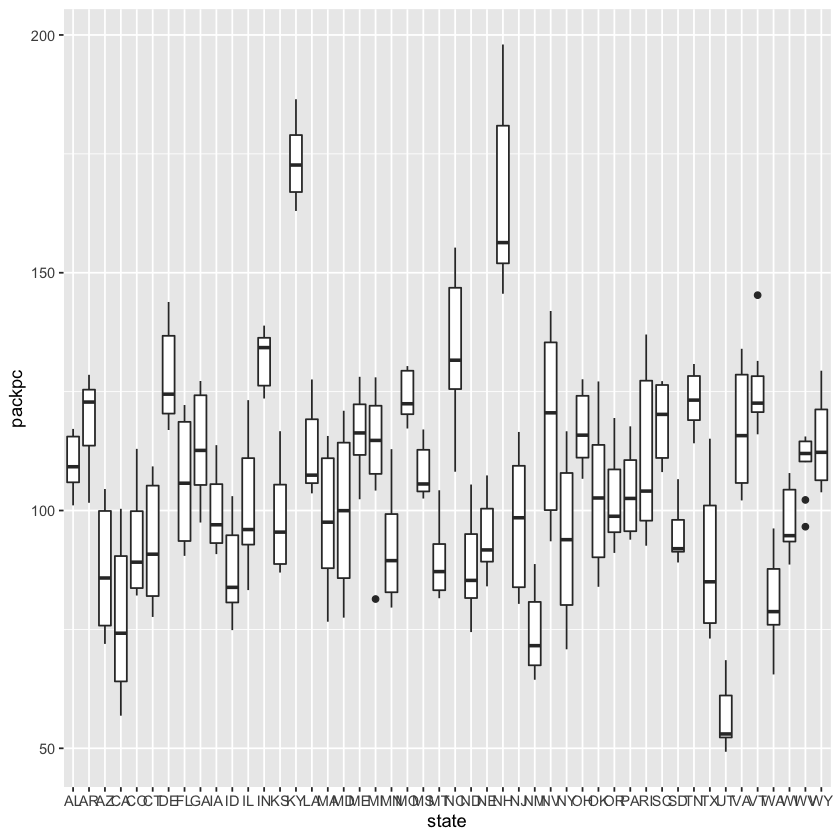

In [5]:

#1. Create a boxplot of the average number of packs per capita by state. Which states have the highest number of packs? Which have the lowest?

ggplot(Cigarette, aes(x = state, y = packpc)) + 
    geom_boxplot() 

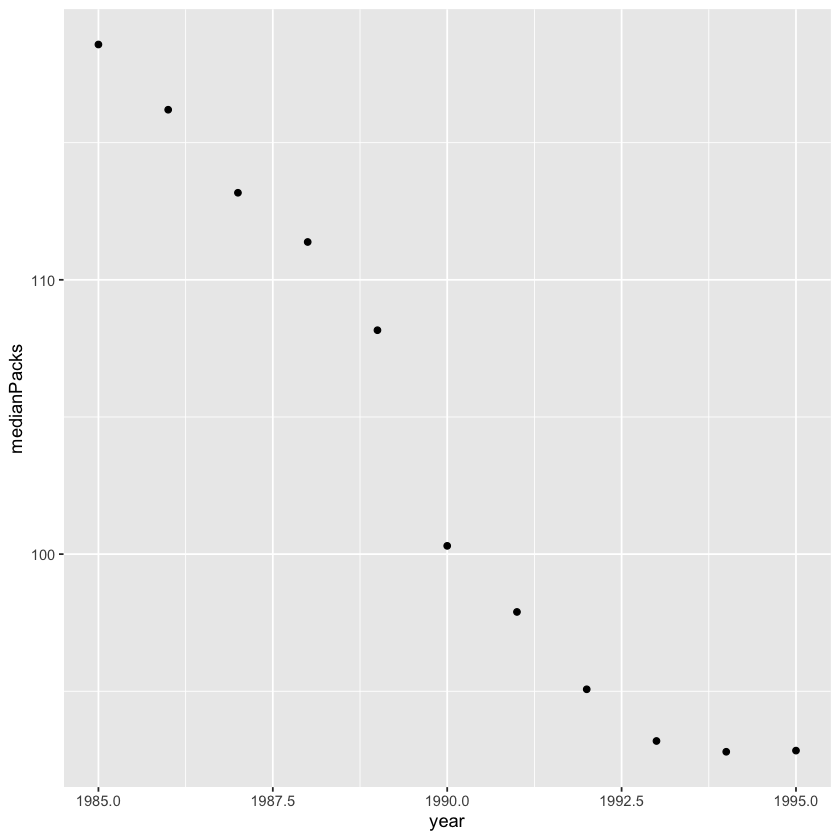

In [11]:
#2. Find the median over all the states of the number of packs per capita for each year. 
# Plot this median value for the years from 1985 to 1995. What can you say about cigarette usage in these years?
medianCigs <- Cigarette %>% select(year, packpc) %>% group_by(year) %>% summarise(medianPacks = median(packpc))
ggplot(medianCigs, aes(x=year, y=medianPacks)) + geom_point()

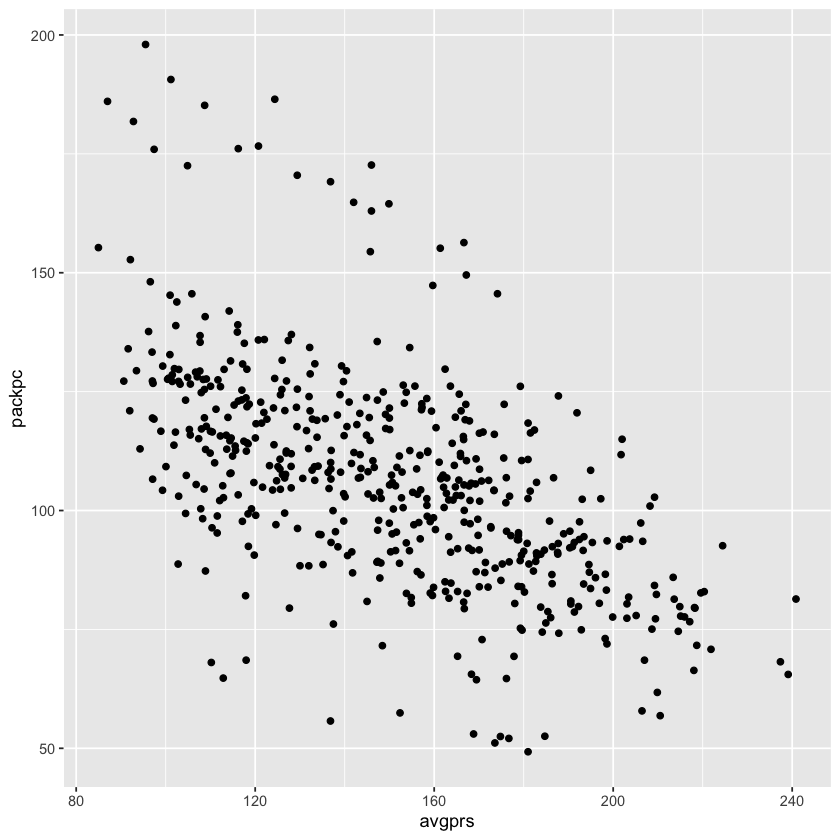

In [12]:
#3. Create a scatter plot of price per pack vs number of packs per capita for all states and years. 
# Are the price and the per capita packs positively correlated, negatively correlated, or uncorrelated? 
# Explain why your answer would be expected.
ggplot(Cigarette, aes(x=avgprs, y=packpc)) + geom_point()

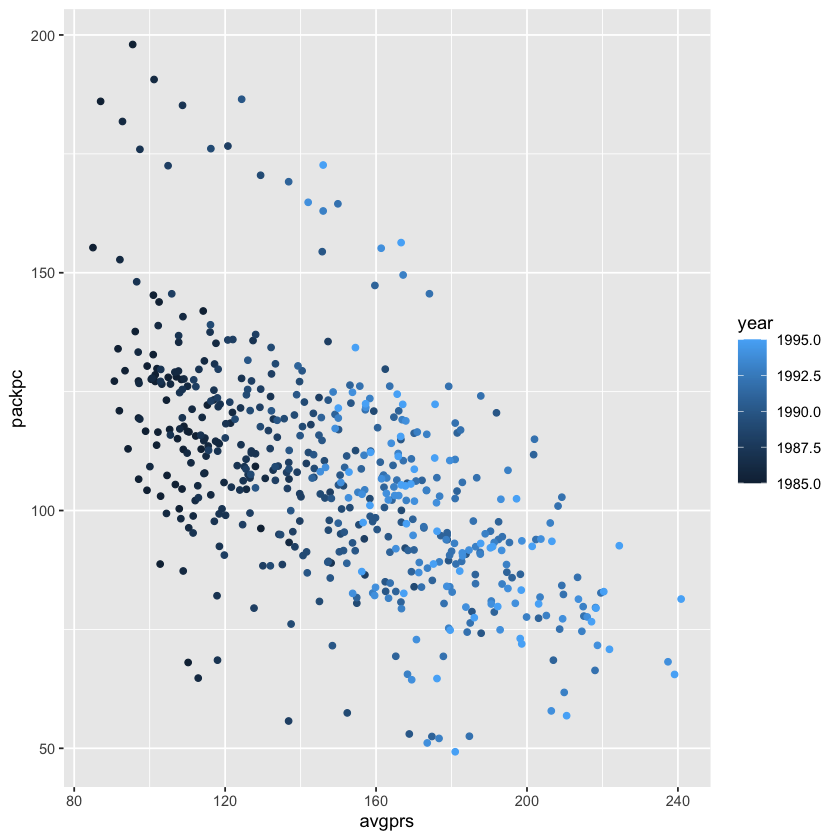

In [13]:
#5.Change your scatter plot to show the points for each year in a different color. 
# Does the relationship between the two variable change over time?

ggplot(Cigarette, aes(x=avgprs, y=packpc, color = year)) + geom_point()

In [14]:
#6. Do a linear regression for these two variables. How much variability does the line explain?
ciglm <- lm(packpc ~ avgprs, Cigarette)
summary(ciglm)


Call:
lm(formula = packpc ~ avgprs, data = Cigarette)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.977  -9.710  -0.716   8.550  69.451 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 167.87737    3.79749   44.21   <2e-16 ***
avgprs       -0.40879    0.02468  -16.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.76 on 526 degrees of freedom
Multiple R-squared:  0.3427,	Adjusted R-squared:  0.3415 
F-statistic: 274.3 on 1 and 526 DF,  p-value: < 2.2e-16


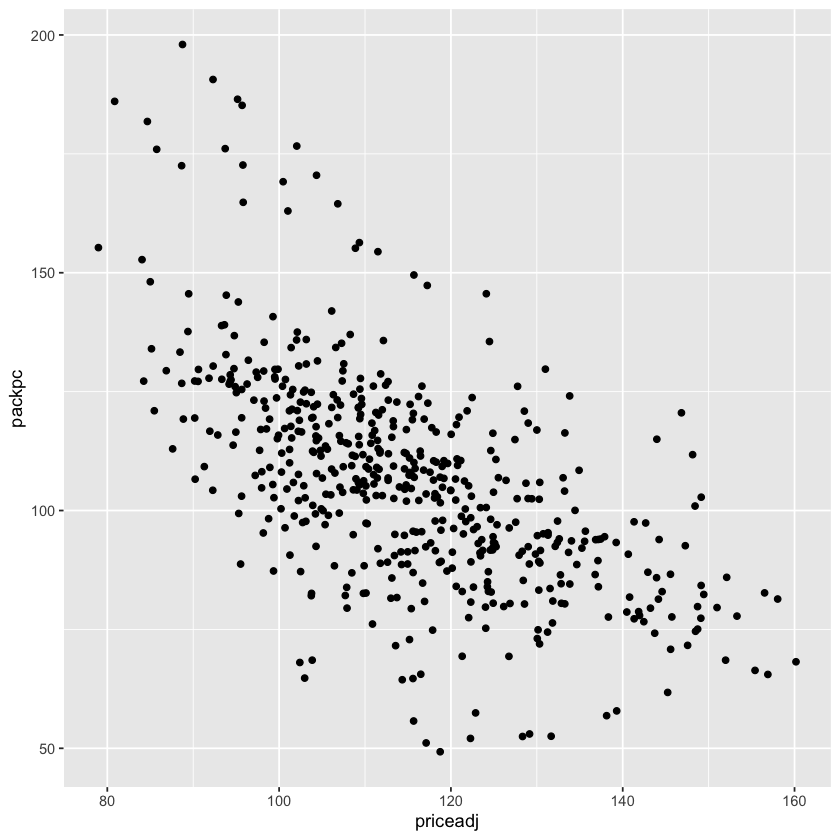


Call:
lm(formula = packpc ~ priceadj, data = Cigarette2)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.673  -9.745   0.074   8.166  67.560 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 211.76821    5.95792   35.54   <2e-16 ***
priceadj     -0.91640    0.05138  -17.84   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.27 on 526 degrees of freedom
Multiple R-squared:  0.3769,	Adjusted R-squared:  0.3757 
F-statistic: 318.1 on 1 and 526 DF,  p-value: < 2.2e-16


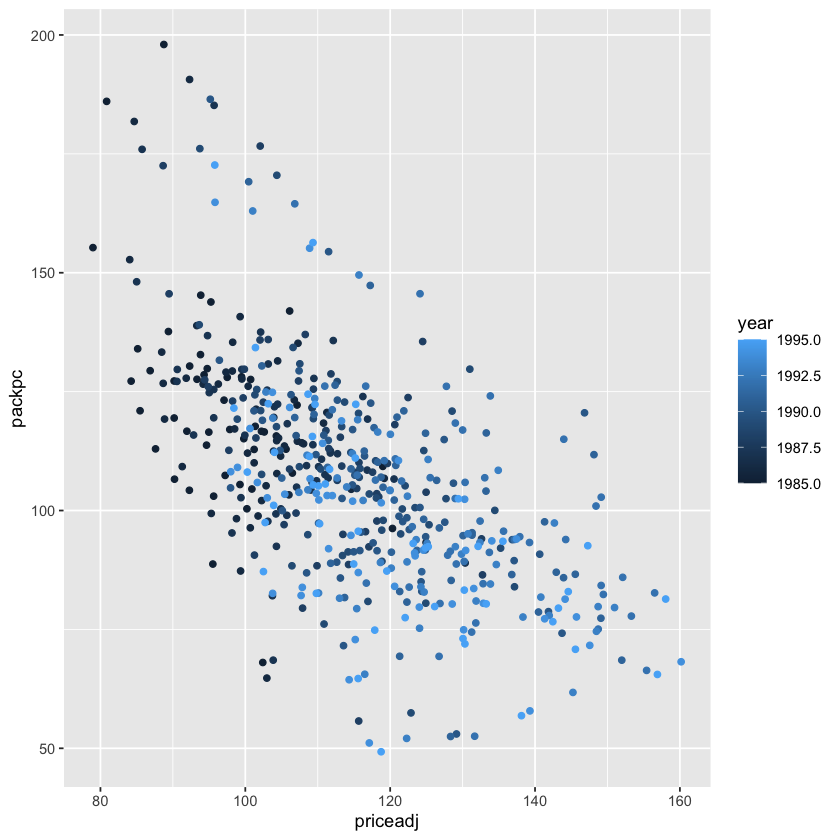

In [15]:
#7. The plot in Part 3 does not adjust for inflation. You can adjust the price of a pack of cigarettes for inflation by 
# dividing the avgprs variable by the cpi variable. Create an adjusted price for each row, then repeat Part 3 using this adjusted price.

Cigarette2 <- Cigarette %>% mutate(priceadj = avgprs / cpi)
ggplot(Cigarette2, aes(x=priceadj, y=packpc)) + geom_point()
ggplot(Cigarette2, aes(x=priceadj, y=packpc, color = year)) + geom_point()
ciglm2 <- lm(packpc ~ priceadj, Cigarette2)
summary(ciglm2)

In [17]:
install.packages("reshape2")

also installing the dependency ‘plyr’





The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpbppvIc/downloaded_packages


In [18]:
library(reshape2)


	Paired t-test

data:  packs95 and packs85
t = -14.789, df = 47, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -29.20576 -22.21151
sample estimates:
mean of the differences 
              -25.70863 


No id variables; using all as measure variables



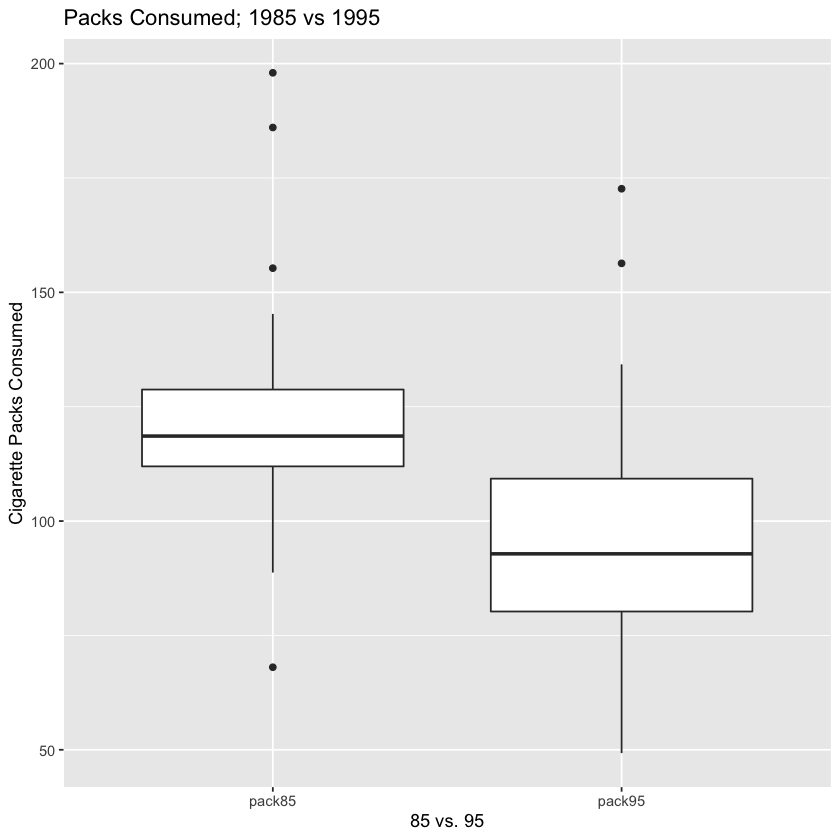

In [19]:
#8.Create a data frame with just the rows from 1985. Create a second data frame with just the rows from 1995. 
# Then, from each of these data frames, get a vector of the number of packs per capita. 
# Use a paired t-test to see if the number of packs per capita in 1995 was significantly different than the number of packs per capita in 1985.

Cigarette95 <- Cigarette %>% filter(year == 1995)
Cigarette85 <- Cigarette %>% filter(year == 1985)

packs95 <- Cigarette95$packpc
packs85 <- Cigarette85$packpc

# TWO SAMPLES
# H0 = mean 1 == mean 2
# H1 = mean 1 != mean 2

t.obj <- t.test(packs95, packs85, paired=TRUE)
t.obj

packs <- data.frame(pack85 = packs85, pack95 = packs95)

ff <- melt(packs)

ggplot(ff) + geom_boxplot(aes(x = variable, y = value)) +
    xlab("85 vs. 95") + ylab("Cigarette Packs Consumed") + ggtitle("Packs Consumed; 1985 vs 1995")

Warning message:
“Removed 48 rows containing missing values (geom_point).”


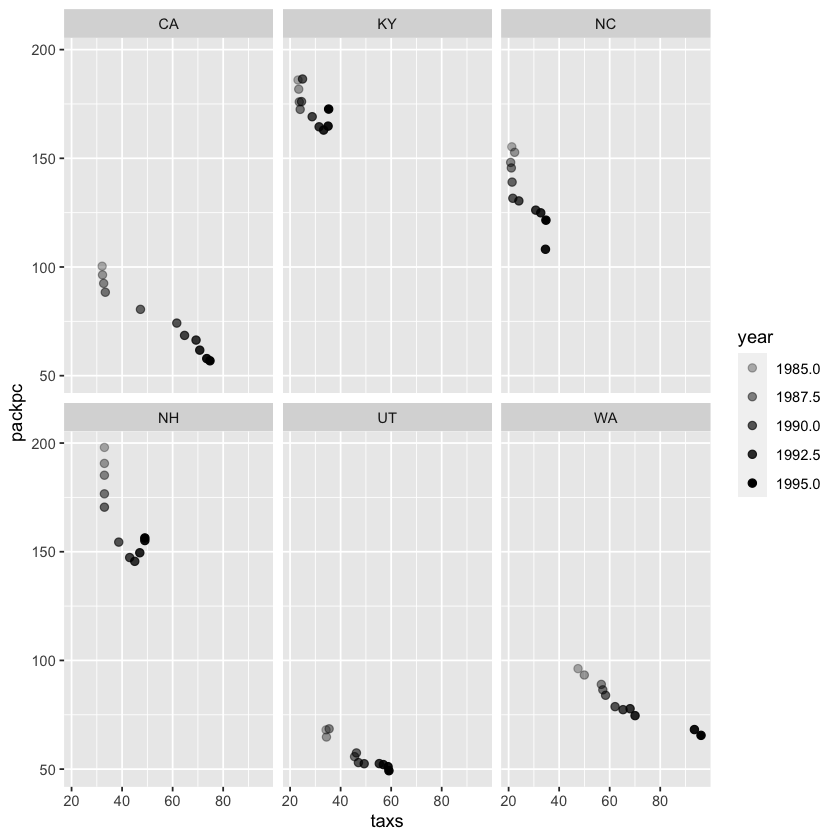

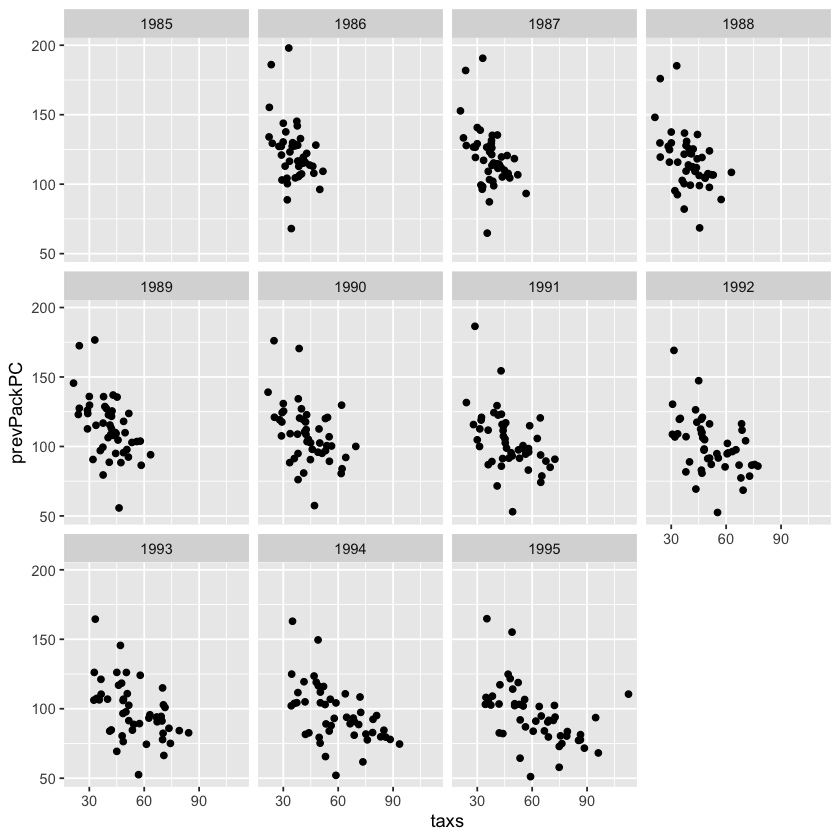

In [20]:
#9. In the process of doing this project, have any questions come to mind that this data set could answer? If so, pick one and do the analysis to find the answer to your question.

Cigarette4 <- Cigarette %>% filter(state %in% c("NH", "KY", "NC", "WA", "CA", "UT"))
ggplot(Cigarette4, aes(x=taxs, y=packpc)) + geom_point(aes(alpha = year), size = 2) + scale_alpha(range = c(0.3, 1.0)) + facet_wrap(~state)

Cigarette3 <- Cigarette %>% group_by(state) %>% arrange(state, year) %>% mutate(prevPackPC = lag(packpc, n = 1))
ggplot(Cigarette3, aes(x=taxs, y=prevPackPC)) + geom_point() + facet_wrap(~year)